In [1]:
import matplotlib.pylab as plt
import plotly.express as px
import matplotlib.patches as patches
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
Injury_tracking = pd.read_csv("Shared_Tables/vis_injury_tracking.csv")

In [3]:
Injury_tracking.dtypes

PlayKey            object
time              float64
event              object
x                 float64
y                 float64
dir               float64
dis               float64
o                 float64
s                 float64
RosterPosition     object
StadiumType        object
FieldType          object
Temperature         int64
Weather            object
PlayType           object
PlayerGamePlay      int64
Position           object
DaysPlayed          int64
BodyPart           object
InjuryDuration    float64
SevereInjury      float64
dtype: object

In [4]:
#creating basic football from kaggle @https://www.kaggle.com/code/robikscube/nfl-big-data-bowl-plotting-player-position/notebook

def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax



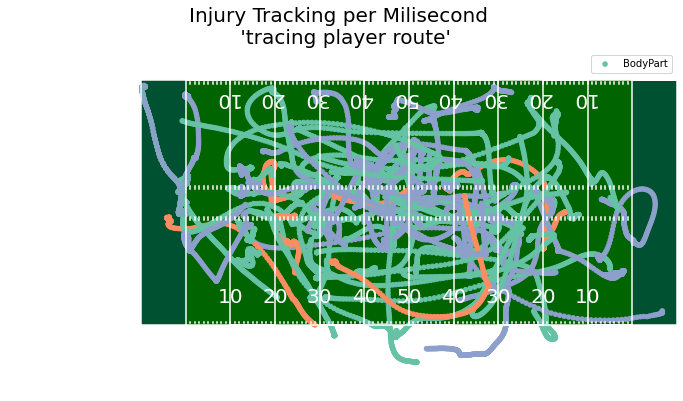

In [5]:
#Injury Tracking 
fig, ax = create_football_field()

color_label= Injury_tracking["BodyPart"].unique()
rgb_values = sns.color_palette("Set2")
color_map= dict(zip(color_label, rgb_values))

Injury_tracking.plot(x='x', y='y', kind='scatter', ax=ax, label='BodyPart',
                    c=Injury_tracking['BodyPart'].map(color_map))

plt.title("Injury Tracking per Milisecond \n 'tracing player route'", fontsize=20)
plt.ylim(-15,60)
plt.xlim(-30,120)
plt.legend()


plt.show()